In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [10]:
data = pd.read_csv("reference.txt", names = ['f', 'p'])
data_ref = data.groupby('f').max().reset_index()
# data_ref = data_ref[data_ref['f'] > 2.25e9]
# data_ref = data_ref[data_ref['f'] < 2.74e9]
peaks = find_peaks(data_ref['p'])
data_ref = data_ref.iloc[peaks[0]]


data = pd.read_csv("horizontal.txt", names = ['f', 'p'])
data_hor = data.groupby('f').max().reset_index()
# data_hor = data_hor[data_hor['f'] > 2.25e9]
# data_hor = data_hor[data_hor['f'] < 2.74e9]
# peaks = find_peaks(data_hor['p'])
data_hor = data_hor.iloc[peaks[0]]

data = pd.read_csv("vertical.txt", names = ['f', 'p'])
data_ver = data.groupby('f').max().reset_index()
# data_ver = data_ver[data_ver['f'] > 2.25e9]
# data_ver = data_ver[data_ver['f'] < 2.74e9]
# peaks = find_peaks(data_ver['p'])
data_ver = data_ver.iloc[peaks[0]]

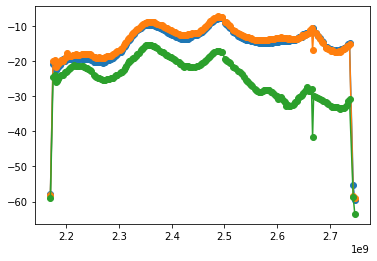

In [11]:
plt.plot(data_ref['f'],data_ref['p'], '-o')
plt.plot(data_hor['f'],data_hor['p'], '-o')
plt.plot(data_ver['f'],data_ver['p'], '-o')

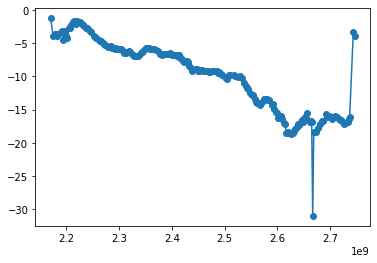

In [12]:
mask = data_ver['p'] - data_ref['p'] < -25

plt.plot(data_ref['f'],data_ver['p'] - data_ref['p'], '-o')

In [6]:
data = pd.read_csv("reference_high.txt", names = ['f', 'p'])
data = data.groupby('f').max().reset_index()
peaks = find_peaks(data['p'])
data_ref_2 = data.iloc[peaks[0]]


data = pd.read_csv("horizontal_high.txt", names = ['f', 'p'])
data = data.groupby('f').max().reset_index()
data_hor_2 = data.iloc[peaks[0]]

data = pd.read_csv("vertical_high.txt", names = ['f', 'p'])
data = data.groupby('f').max().reset_index()
data_ver_2 = data.iloc[peaks[0]]

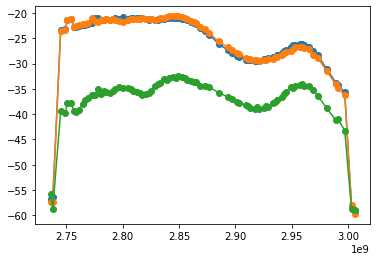

In [7]:
plt.plot(data_ref_2['f'],data_ref_2['p'], '-o')
plt.plot(data_hor_2['f'],data_hor_2['p'], '-o')
plt.plot(data_ver_2['f'],data_ver_2['p'], '-o')

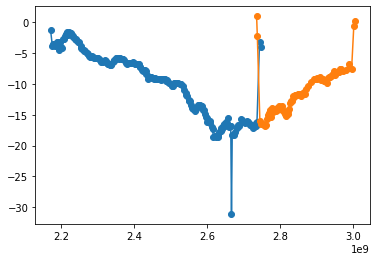

In [8]:
plt.plot(data_ref['f'],data_ver['p'] - data_ref['p'], '-o')
plt.plot(data_ref_2['f'],data_ver_2['p'] - data_ref_2['p'], '-o')

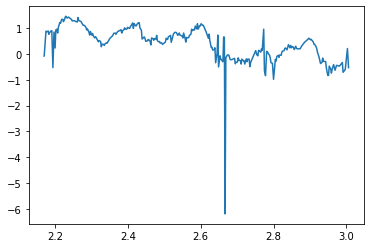

In [15]:
f_1 = data_ref['f'].to_numpy()/1e9
T_1 = data_hor['p'].to_numpy() - data_ref['p'].to_numpy()
mask = f_1 < 2.74
f_1 = f_1[mask]
T_1 = T_1[mask]

f_2 = data_ref_2['f'].to_numpy()/1e9
T_2 = data_hor_2['p'].to_numpy() - data_ref_2['p'].to_numpy()
mask = f_2 > 2.75
f_2 = f_2[mask]
T_2 = T_2[mask]

f = np.concatenate((f_1, f_2))
T = np.concatenate((T_1, T_2))
plt.plot(f, T)

In [16]:
np.savetxt("horizontal_hackRF.txt", np.array([f, T]).T)

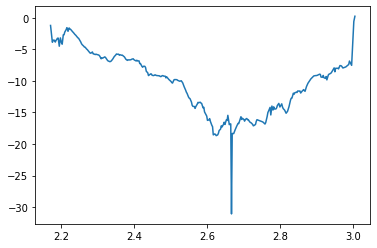

In [17]:
f_1 = data_ref['f'].to_numpy()/1e9
T_1 = data_ver['p'].to_numpy() - data_ref['p'].to_numpy()
mask = f_1 < 2.74
f_1 = f_1[mask]
T_1 = T_1[mask]

f_2 = data_ref_2['f'].to_numpy()/1e9
T_2 = data_ver_2['p'].to_numpy() - data_ref_2['p'].to_numpy()
mask = f_2 > 2.75
f_2 = f_2[mask]
T_2 = T_2[mask]

f = np.concatenate((f_1, f_2))
T = np.concatenate((T_1, T_2))
plt.plot(f, T)

In [18]:
np.savetxt("vertical_hackRF.txt", np.array([f, T]).T)